# Comparison of het1 and het2 scenarios

I wanted to compare these two scenarios to assess the variability between them. Het1 has a strip of "urbanized land" along the bottom of the x slope (note that the plots should be rotated 90' counter clockwise to be in coordinate form). The strip spans the entire "y" length (10). It is directly connected to the lowest point in the domain (0,0). 

Het2 has that same strp of "urbanized land", but located long the top of the x slope. 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

%matplotlib inline

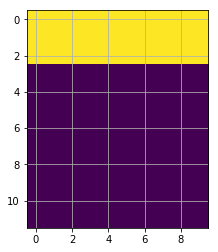

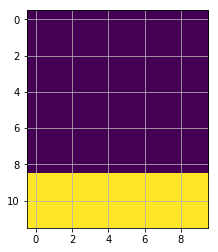

In [25]:
scen1 = np.ones((12,10))
scen1[:3,] = 2
scen2 = np.ones((12,10))
scen2[9:] = 2

imshow(scen1, interpolation='nearest')
grid(True)
show()


imshow(scen2, interpolation='nearest')
grid(True)
show()

In [4]:
het1 = pd.read_csv('het1.csv')
het2 = pd.read_csv('het2_10yr.csv')
# use the 4th year of the spinup
het2 = het2[8761*3:8761*4]
het2['t'] = range(0,8761)

## Overland Flow 

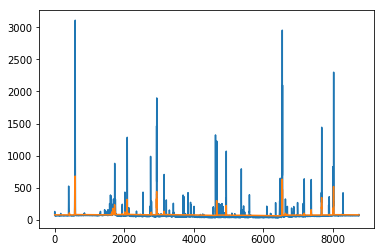

In [5]:
fig = plt.figure()
ax = plt.axes()

ax.plot(het1['t'], -het1['overland_flow'])
ax.plot(het2['t'], -het2['overland_flow'])

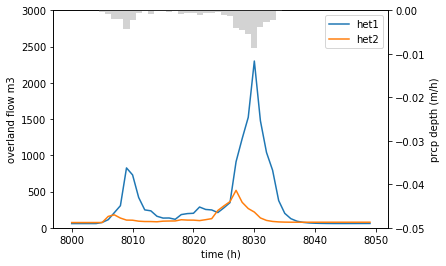

In [59]:
# zoom into one event
fig, ax = plt.subplots()

start = 8000
end = 8050

ax.plot(het1['t'][start:end], -het1['overland_flow'][start:end], label='het1')
ax.plot(het2['t'][start:end], -het2['overland_flow'][start:end], label='het2')
plt.ylim([0, 3000])

ax2 = ax.twinx()
ax2.bar(het2['t'][start:end], -het2['prcp_v'][start:end]/(1200*1000), width = 1, color = 'lightgray', )
plt.ylim([-0.05,0])


ax2.set_ylabel('prcp depth (m/h)')
ax.set_ylabel('overland flow m3')
ax.set_xlabel('time (h)')

ax.legend()

fig.show()

### Cumulative overland flow 

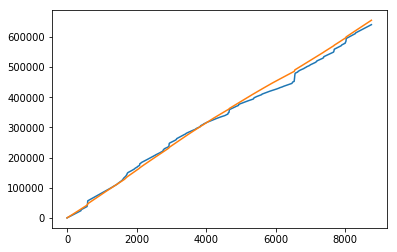

In [6]:
fig = plt.figure()
ax = plt.axes()

ax.plot(het1['t'], -het1['overland_flow'].cumsum())
ax.plot(het2['t'], -het2['overland_flow'].cumsum())

### Log scale

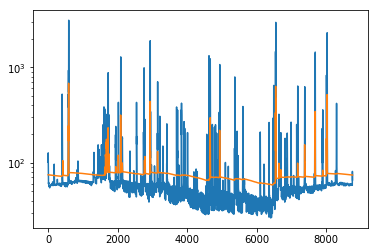

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.set_yscale('log')

ax.plot(het1['t'], -het1['overland_flow'])
ax.plot(het2['t'], -het2['overland_flow'])  # het2, lower peaks, more baseflow

In [8]:
het1['overland_flow'].describe()

count    8761.000000
mean      -73.143288
std       118.828537
min     -3112.347335
25%       -62.488098
50%       -57.277140
75%       -47.378460
max       -26.353412
Name: overland_flow, dtype: float64

In [9]:
het2['overland_flow'].describe()

count    8761.000000
mean      -74.814669
std        21.446652
min      -680.464945
25%       -76.829844
50%       -73.603562
75%       -70.170306
max       -58.300032
Name: overland_flow, dtype: float64

## Subsurface storage

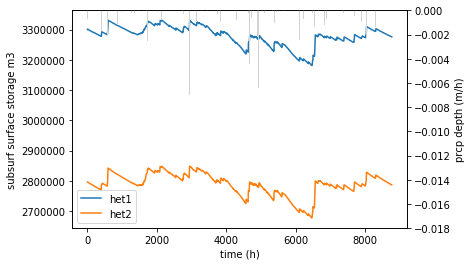

In [65]:
fig = plt.figure()
ax = plt.axes()

ax.plot(het1['t'], het1['vdz_subsurfstor'], label = 'het1')
ax.plot(het2['t'], het2['vdz_subsurfstor'], label = 'het2')    # less subsurface storage

ax2 = ax.twinx()
ax2.bar(het2['t'], -het2['prcp_v']/(1200*1000), width = 1, color = 'lightgray', )
#plt.ylim([-0.05,0])


ax2.set_ylabel('prcp depth (m/h)')
ax.set_ylabel('subsurf surface storage m3')
ax.set_xlabel('time (h)')

ax.legend()

fig.show()

In [11]:
het1['vdz_subsurfstor'].describe()

count    8.762000e+03
mean     3.279459e+06
std      3.287972e+04
min      3.181106e+06
25%      3.265485e+06
50%      3.284168e+06
75%      3.302470e+06
max      3.330872e+06
Name: vdz_subsurfstor, dtype: float64

## Surface storage 

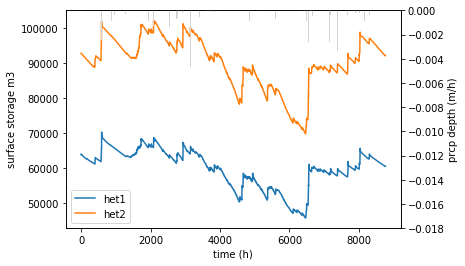

In [64]:
fig = plt.figure()
ax = plt.axes()

ax.plot(het1['t'], het1['surf_stor'], label = 'het1')
ax.plot(het2['t'], het2['surf_stor'], label = 'het2')   # a lot more surface storage

ax2 = ax.twinx()
ax2.bar(het2['t'], -het2['prcp_v']/(1200*1000), width = 1, color = 'lightgray', )
#plt.ylim([-0.05,0])


ax2.set_ylabel('prcp depth (m/h)')
ax.set_ylabel('surface storage m3')
ax.set_xlabel('time (h)')

ax.legend()

fig.show()

## Evaptrans

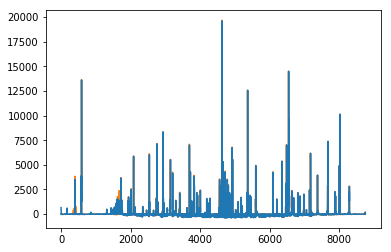

In [13]:
fig = plt.figure()
ax = plt.axes()

ax.plot(het1['t'], het1['vdz_et'], zorder = 1)
ax.plot(het2['t'], het2['vdz_et'], zorder = 0) 

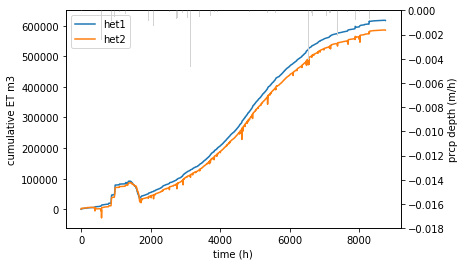

In [63]:
fig = plt.figure()
ax = plt.axes()

ax.plot(het1['t'], (het1['prcp_v'] - het1['vdz_et'] ).cumsum(), label = 'het1')  # more et happening from het1
ax.plot(het2['t'], (het2['prcp_v'] - het2['vdz_et'] ).cumsum(), label = 'het2')  

ax2 = ax.twinx()
ax2.bar(het2['t'], -het2['prcp_v']/(1200*1000), width = 1, color = 'lightgray', )
#plt.ylim([-0.05,0])


ax2.set_ylabel('prcp depth (m/h)')
ax.set_ylabel('cumulative ET m3')
ax.set_xlabel('time (h)')

ax.legend()

fig.show()